In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [14]:
import numpy as np
import matplotlib.pyplot as plt


from HOTS.Event import Event
from HOTS.STS import STS
from HOTS.Layer import ClusteringLayer, FilterNHBD
from HOTS.Monitor import DisplayImage, DisplayHisto
from HOTS.Tools import SaveObject, LoadObject, GenerateHistogram
from HOTS.Classifier import Classifier
from HOTS.Network import Network
from HOTS.Monitor import DisplaySurface2D
from HOTS.Tools import EuclidianNorm, BattachaNorm, NormalizedNorm


# Defining General Parameter

In [15]:
SaveCluster = True
LoadCluster = True

ClusterFile = '../Records/ClassifyingNotebook/Clusters.pkl'
tau = 0.02
R = 2
KN = 2
nb_cluster = 4
ImageSize = (32,32)

## Training the Cluster on 5 images

In [49]:
image_list = [1, 32, 19, 22, 29]
event0 = Event(ImageSize=(32,32), ListPolarities=[-1,1])

event0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)

InputFilter = FilterNHBD(threshold=15,neighbourhood=2)
L1 = ClusteringLayer(tau=tau, R=R, verbose=1)
L2 = ClusteringLayer(tau=10*tau, R=KN*R, verbose=1)
L3 = ClusteringLayer(tau=10*10*tau, R=KN*KN*R, verbose=1)

print(event0.address.shape)
event1 = InputFilter.RunFilter(event0)
print(event1.address.shape[0])
event2, ClusterLayer1= L1.TrainLayer(event1, nb_cluster=nb_cluster)
event3, ClusterLayer2 = L2.TrainLayer(event2, nb_cluster=2*nb_cluster)
event4, ClusterLayer3 = L3.TrainLayer(event3, nb_cluster=2*2*nb_cluster)


if SaveCluster==True:
    SaveObject([ClusterLayer1,ClusterLayer2,ClusterLayer3],ClusterFile)

chargement des images [1, 32, 19, 22, 29]
(74457, 2)
58993
Generation of SpatioTemporal Surface in ------ 1.11 s
Clustering SpatioTemporal Surface in ------ 1.70 s
Generation of SpatioTemporal Surface in ------ 1.38 s
Clustering SpatioTemporal Surface in ------ 2.25 s
Generation of SpatioTemporal Surface in ------ 3.20 s
Clustering SpatioTemporal Surface in ------ 6.84 s


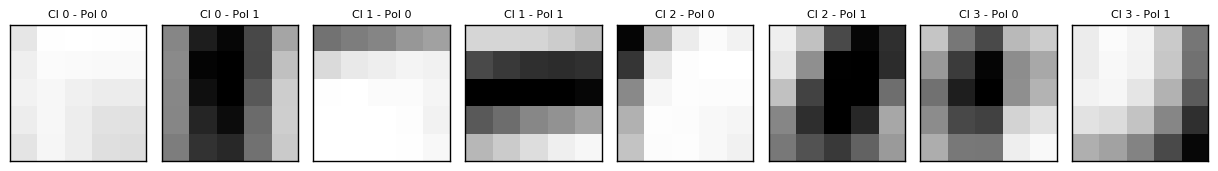

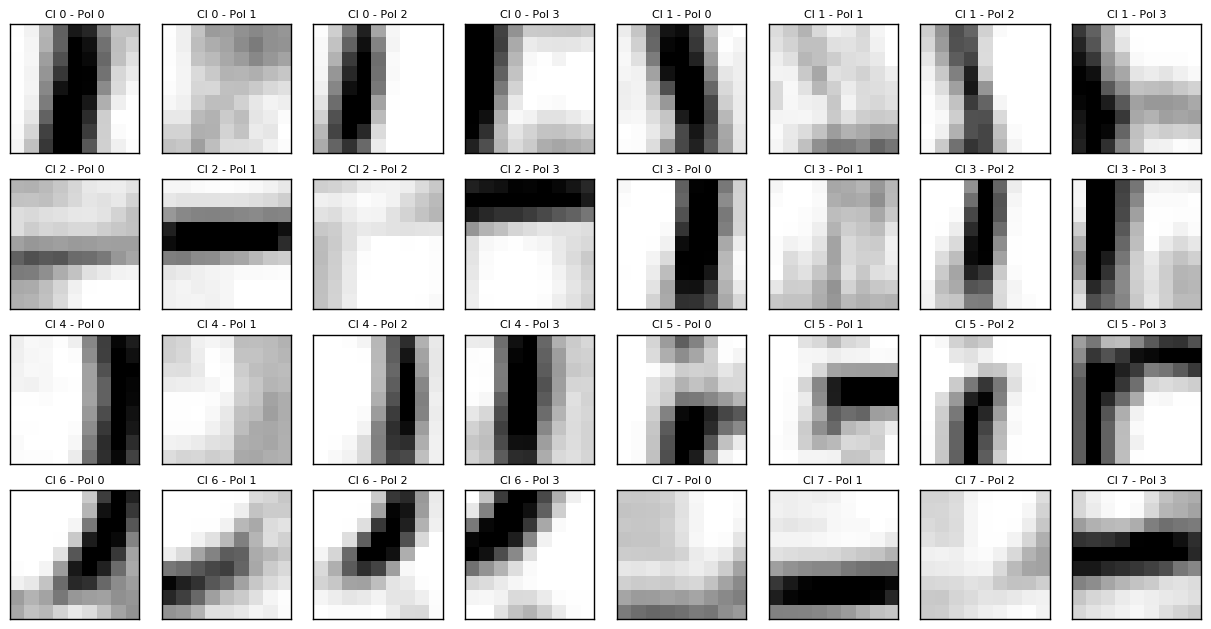

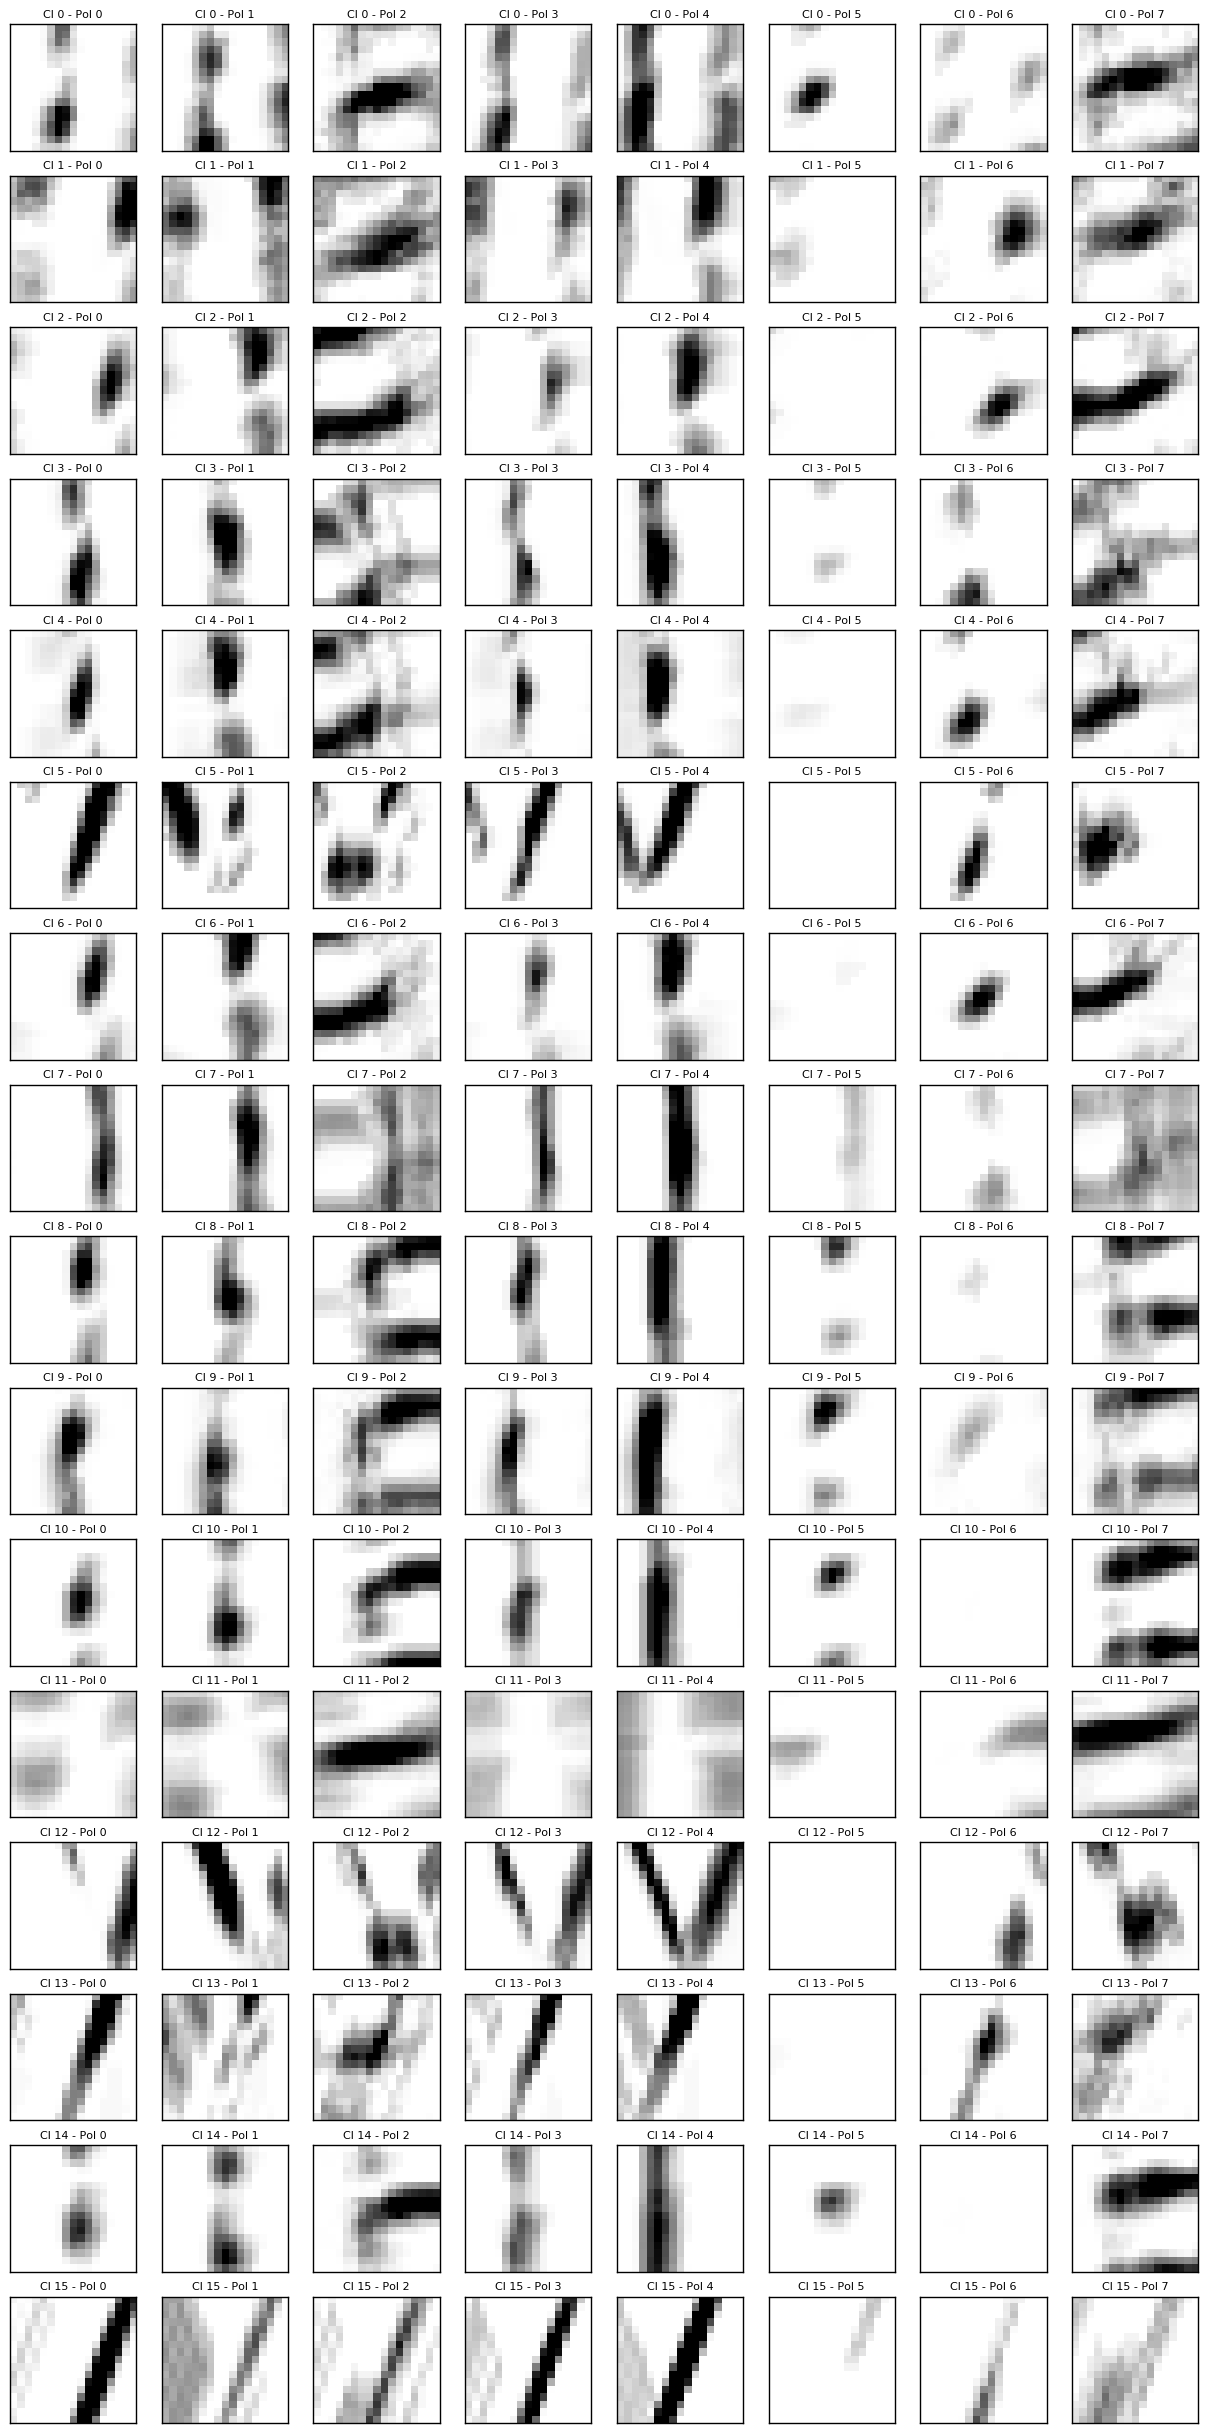

In [20]:
DisplaySurface2D(ClusterLayer1.prototype, nb_polarities=2)
DisplaySurface2D(ClusterLayer2.prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer3.prototype, nb_polarities=8)

## Generating Histogram for the training samples

In [7]:
if LoadCluster==True:
    ClusterLayer1, ClausterLayer2, ClusterLayer3 = LoadObject(ClusterFile)


training_sample = list(np.arange(36))


event0_tr = Event(ImageSize=(32,32), ListPolarities=[-1,1])
event0_tr.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=training_sample)

InputFilter = FilterNHBD(threshold=15,neighbourhood=2)
event1_tr = InputFilter.RunFilter(event0_tr)

L1 = ClusteringLayer(tau=tau, R=R, verbose=0)
event2_tr = L1.RunLayer(event1_tr, Cluster=ClusterLayer1)
L2 = ClusteringLayer(tau=10*tau, R=2*R,verbose=0)
event3_tr = L2.RunLayer(event2_tr, Cluster=ClusterLayer2)
L3 = ClusteringLayer(tau=10*10*tau, R= 2*2*R, verbose=0)
event4_tr = L3.RunLayer(event3_tr, Cluster=ClusterLayer3)

chargement des images [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


## Generating Histograms for the test sample

In [8]:
if LoadCluster==True:
    ClusterLayer1, ClausterLayer2, ClusterLayer3 = LoadObject(ClusterFile)

testing_sample = list(np.arange(36,76))
event0_te = Event(ImageSize=(32,32), ListPolarities=[-1,1])

event0_te.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=testing_sample)

InputFilter = FilterNHBD(threshold=15,neighbourhood=2)
event1_te = InputFilter.RunFilter(event0_te)

L1 = ClusteringLayer(tau=tau, R=R, verbose=0)
event2_te = L1.RunLayer(event1_te, Cluster=ClusterLayer1)
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0)
event3_te = L2.RunLayer(event2_te, Cluster=ClusterLayer2)
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0)
event4_te = L3.RunLayer(event3_te, Cluster=ClusterLayer3)

chargement des images [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [9]:
label_list=LoadObject('../Data/alphabet_label.pkl')
## Generate Groud Truth Label
for idx,img in enumerate(testing_sample):
    if idx!= 0:
        test_label = np.vstack((test_label,label_list[img]))
    else:
        test_label = label_list[img]

In [10]:
print(test_label, len(test_label))
print(label_list, len(label_list))

[['X' '14646']
 ['F' '11356']
 ['Y' '10149']
 ['G' '15511']
 ['Z' '14019']
 ['H' '17054']
 ['0' '14819']
 ['I' '8167']
 ['1' '8644']
 ['J' '8143']
 ['2' '11447']
 ['K' '15819']
 ['3' '11978']
 ['L' '8303']
 ['4' '12605']
 ['M' '28315']
 ['5' '11910']
 ['N' '18447']
 ['6' '13574']
 ['O' '15313']
 ['7' '8628']
 ['P' '13562']
 ['8' '13507']
 ['Q' '15990']
 ['9' '13864']
 ['R' '16820']
 ['S' '12001']
 ['A' '15440']
 ['T' '9098']
 ['B' '17803']
 ['U' '14373']
 ['C' '12621']
 ['V' '13523']
 ['D' '17290']
 ['W' '27736']
 ['E' '15213']
 ['X' '14323']
 ['F' '11410']
 ['Y' '10230']
 ['G' '14544']] 40
[('X', 14812), ('F', 11472), ('Y', 10978), ('G', 15578), ('Z', 14688), ('H', 16841), ('0', 14493), ('I', 6346), ('1', 9017), ('J', 8130), ('2', 12730), ('K', 15852), ('3', 12331), ('L', 10718), ('4', 14178), ('M', 28692), ('5', 12688), ('N', 18558), ('6', 14169), ('O', 15664), ('7', 9441), ('P', 13586), ('8', 14715), ('Q', 15812), ('9', 15067), ('R', 16944), ('S', 12674), ('A', 15604), ('T', 9524), 

In [11]:
Classif0 = Classifier(event4_tr,event4_te,TrainingLabel=label_list, GroundTruth=test_label)
_,_,_ = Classif0.HistogramDistance()


(40, 16)
(36, 16)
(40, 1)
(40, 1)
(40, 1)
Classification Accuracy : 
 Euclidian Norm 85.00% 
 Normalized Norm 82.50%             
 BattachaNorm 85.00%


In [12]:
print(len(label_list))

print(len(test_label))

76
40


## Doing the same thing with the network class

In [67]:
tau = 0.02
R = 2
KN = 2
nb_cluster = 4
ImageSize = (32,32)

In [68]:
## Defining the network
InputFilter = FilterNHBD(threshold=15,neighbourhood=2)
L1 = ClusteringLayer(tau=tau, R=R, verbose=0)
L2 = ClusteringLayer(tau=10*tau, R=2*R, verbose=0)
L3 = ClusteringLayer(tau=10*10*tau, R=2*2*R, verbose=0)

Net = Network([InputFilter,L1,L2,L3])          

#### Training The Cluster on 5 images

In [73]:
image_list = [1, 32, 19, 22, 29]
event0 = Event(ImageSize=(32,32), ListPolarities=[-1,1])
event0.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=image_list)

ClusterLayer, event_output = Net.TrainCluster(event = event0,nb_cluster=nb_cluster, KN=KN, NbCycle=10)

chargement des images [1, 32, 19, 22, 29]
58993
58993
58993
58993


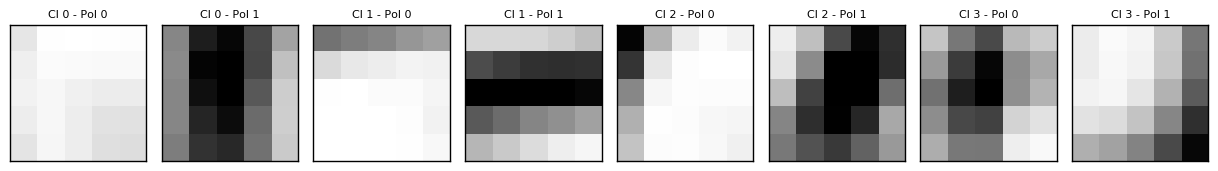

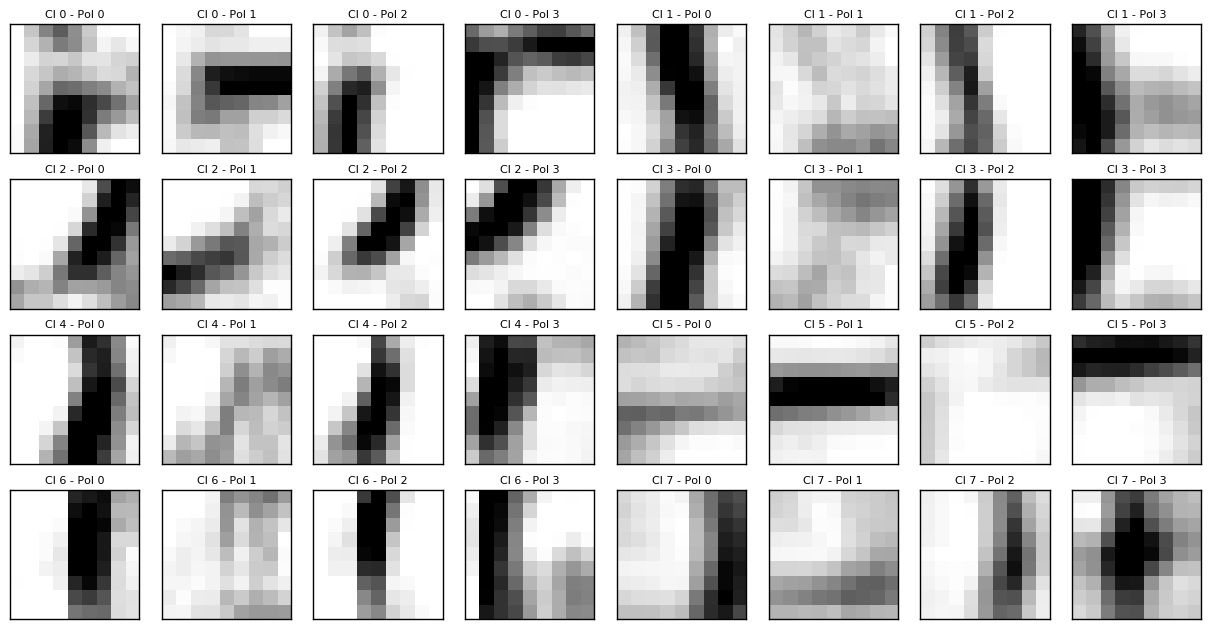

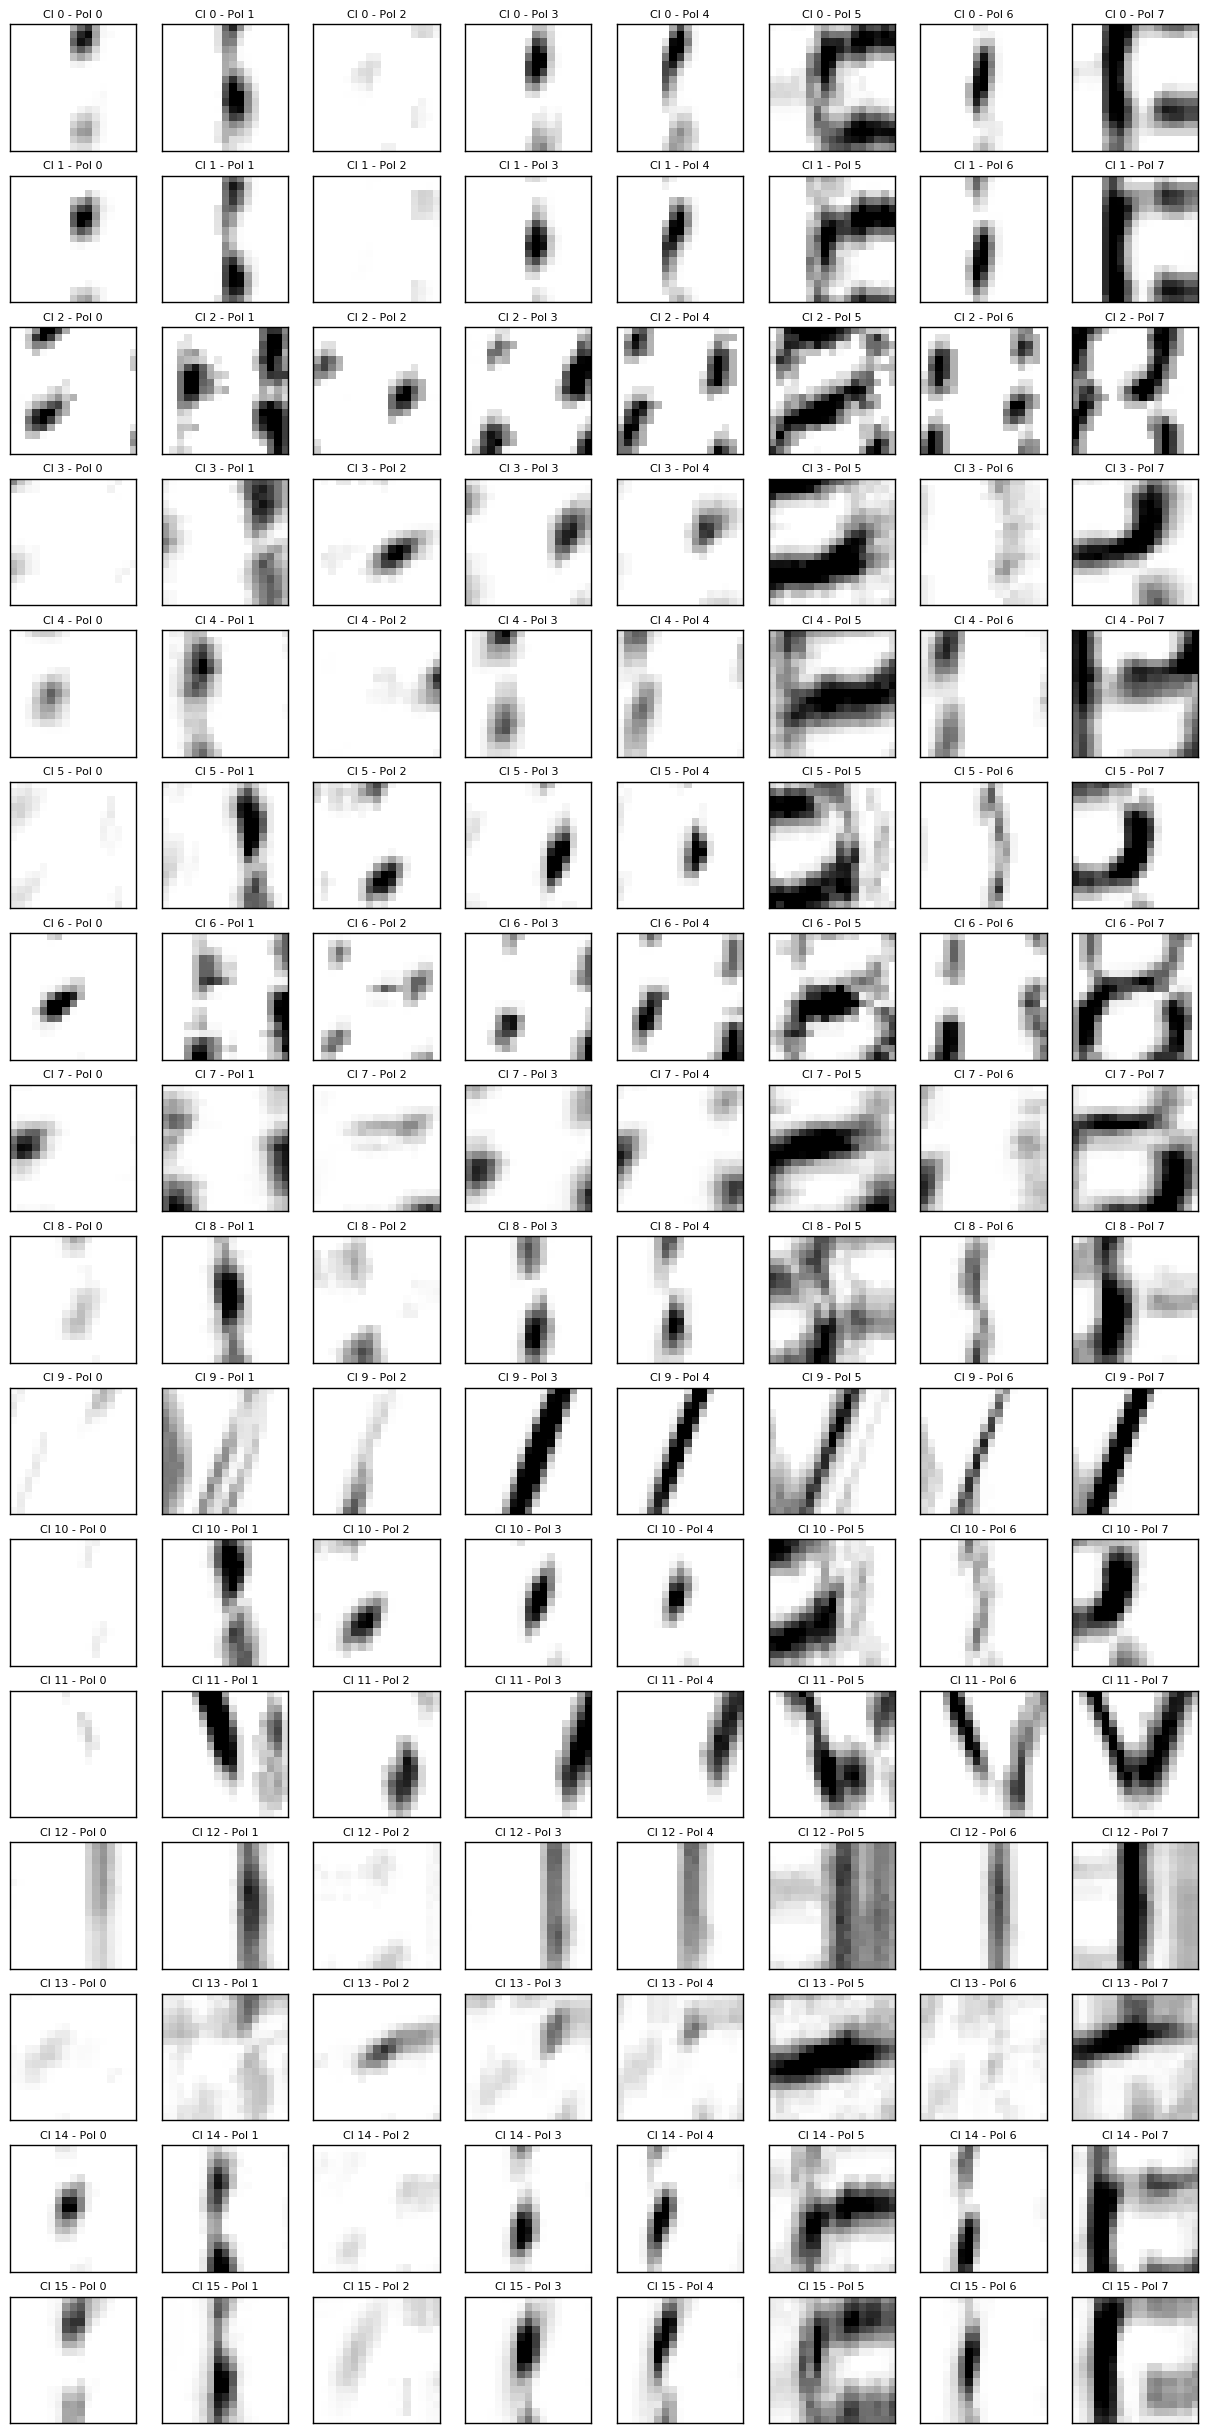

In [74]:
DisplaySurface2D(ClusterLayer[0].prototype, nb_polarities=2)
#print(ClusterLayer[0].prototype.shape)
DisplaySurface2D(ClusterLayer[1].prototype, nb_polarities=4)
DisplaySurface2D(ClusterLayer[2].prototype, nb_polarities=8)

#### Generating Histogram for the training samples

In [75]:
training_sample = list(np.arange(36))
event0_tr = Event(ImageSize=(32,32), ListPolarities=[-1,1])
event0_tr.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=training_sample)

event0_o_tr = Net.RunNetwork(event0_tr, ClusterList=ClusterLayer)

chargement des images [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [99]:
print(len(training_sample))

36


In [76]:
#### Generating Histogram for the test samples

In [77]:
testing_sample = list(np.arange(36,76))
event0_te = Event(ImageSize=(32,32), ListPolarities=[-1,1])
event0_te.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=testing_sample)

event0_o_te = Net.RunNetwork(event0_te, ClusterList=ClusterLayer)

chargement des images [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [78]:
label_list=LoadObject('../Data/alphabet_label.pkl')
## Generate Groud Truth Label
for idx,img in enumerate(testing_sample):
    if idx!= 0:
        test_label = np.vstack((test_label,label_list[img]))
    else:
        test_label = label_list[img]

In [79]:
print(test_label, len(test_label))
Classif0 = Classifier(event0_o_tr,event0_o_te, TrainingLabel=label_list, GroundTruth=test_label)
_,_,_ = Classif0.HistogramDistance()



[['X' '14646']
 ['F' '11356']
 ['Y' '10149']
 ['G' '15511']
 ['Z' '14019']
 ['H' '17054']
 ['0' '14819']
 ['I' '8167']
 ['1' '8644']
 ['J' '8143']
 ['2' '11447']
 ['K' '15819']
 ['3' '11978']
 ['L' '8303']
 ['4' '12605']
 ['M' '28315']
 ['5' '11910']
 ['N' '18447']
 ['6' '13574']
 ['O' '15313']
 ['7' '8628']
 ['P' '13562']
 ['8' '13507']
 ['Q' '15990']
 ['9' '13864']
 ['R' '16820']
 ['S' '12001']
 ['A' '15440']
 ['T' '9098']
 ['B' '17803']
 ['U' '14373']
 ['C' '12621']
 ['V' '13523']
 ['D' '17290']
 ['W' '27736']
 ['E' '15213']
 ['X' '14323']
 ['F' '11410']
 ['Y' '10230']
 ['G' '14544']] 40
(40, 16)
(36, 16)
(40, 1)
(40, 1)
(40, 1)
Classification Accuracy : 
 Euclidian Norm 92.50% 
 Normalized Norm 90.00%             
 BattachaNorm 97.50%


In [80]:
print(len(label_list))
print(len(test_label))

76
40


In [ ]:
### testing the k-nn classifier

In [122]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from HOTS.Tools import GenerateHistogram
histo_train, pola_train = GenerateHistogram(event0_o_tr)
histo_test, pola_test = GenerateHistogram(event0_o_te)
cla = KNN(n_neighbors=1)
training_label = np.array(label_list)[0:36,0]
test_label = np.array(label_list)[36:76,0]

In [123]:
print(training_label.shape)
print(test_label)
cla.fit(histo_train,training_label)


(36,)
['X' 'F' 'Y' 'G' 'Z' 'H' '0' 'I' '1' 'J' '2' 'K' '3' 'L' '4' 'M' '5' 'N'
 '6' 'O' '7' 'P' '8' 'Q' '9' 'R' 'S' 'A' 'T' 'B' 'U' 'C' 'V' 'D' 'W' 'E'
 'X' 'F' 'Y' 'G']


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [124]:
res = cla.predict(histo_test)

In [125]:
print(np.sum(res==test_label)/test_label.shape[0])

0.925


In [ ]:
res==